# Análise de vendas de Video-games ao longo dos anos

### Primeiramente baixei as tabelas constantes na url utilizando o pandas para fazer o webscrapping 
### Foram obtidas 4 tabelas:
#### - Tabela Geral constando vendas gerais de video games
#### - Tabela de vendas dos Consoles de Mesa
#### - Tabela de vendas de Portáteis
#### - Tabela de vendas de Edições Comemorativas de Consoles de Mesa

In [27]:
%pip install lxml

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


##### Na url abaixo foi onde encontrei as tabelas

In [29]:
url = "https://pt.wikipedia.org/wiki/Lista_de_consoles_de_jogos_eletr%C3%B4nicos_mais_vendidos"
df = pd.read_html(url)

In [30]:
tabela = df[0]

##### Analisando a tabela notei que as Unidades Vendidas estavam como objeto (string)

In [31]:
tabela_mesa = df[1]
tabela_mesa

,Pos.,Plataforma,Unidades vendidas,Empresa,Lançamento[2],Ref.
0,1,PlayStation 2,>155 milhões,Sony,2000,[a]
1,2,Nintendo Switch,"139,36 milhões",Nintendo,2017,[31]
2,3,PlayStation 4,"117,2 milhões",Sony,2013,[33]
3,4,PlayStation,"102,49 milhões",Sony,1994,[34]
4,5,Wii,"101,63 milhões",Nintendo,2006,[30]
5,6,PlayStation 3,">87,4 milhões",Sony,2006,[a]
6,7,Xbox 360,>84 milhões,Microsoft,2005,[c]
7,8,Nintendo Entertainment System,"61,91 milhões",Nintendo,1983,[30]
8,9,Xbox One,51 milhões (estimado),Microsoft,2013,[c]
9,10,Super Nintendo Entertainment System,"49,10 milhões",Nintendo,1990,[30]


In [32]:
tabela_portatil= df[2]
tabela_portatil

,Pos.,Plataforma,Unidades vendidas,Empresa,Lançamento[2],Ref.
0,1,Nintendo DS,"154,02 milhões",Nintendo,2004,[30]
1,2,Nintendo Switch,"139,36 milhões",Nintendo,2017,[31]
2,3,Game Boy Advance,"81,51 milhões",Nintendo,2001,[30]
3,4,PlayStation Portable,80–82 milhões (estimado),Sony,2004,[a]
4,5,Nintendo 3DS,"75,94 milhões",Nintendo,2011,[44]
5,6,Game Boy,"69,42 milhões",Nintendo,1989,[b]
6,7,Game Boy Color,"49,27 milhões",Nintendo,1998,[b]
7,8,Sega Game Gear,"10,62 milhões",Sega,1990,[50]
8,9,PlayStation Vita,10–15 milhões (estimado),Sony,2011,[a]
9,10,N-Gage,3 milhões,Nokia,2003,[75]


In [33]:
tabela_mesa_especial = df[3]
tabela_mesa_especial 

,Pos.,Plataforma,Unidades vendidas,Empresa,Lançamento[2],Ref.
0,1,Super NES Classic Edition,"5,28 milhões",Nintendo,2017,[63]
1,2,Color TV Game,3 milhões,Nintendo,1977,[72][73]
2,3,NES Classic Edition,"2,3 milhões",Nintendo,2016,[76]
3,4,Coleco Telstar,>1 milhão,Coleco,1976,[85][l]


##### Como se pode observar na tabela Geral e em todas as outras Unidades vendidas veio como String e posteriormente feitos os tratamnentos de string alterei para float

In [34]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pos.               42 non-null     int64 
 1   Plataforma         42 non-null     object
 2   Unidades vendidas  42 non-null     object
 3   Empresa            42 non-null     object
 4   Lançamento[2]      42 non-null     object
 5   Ref.               42 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.1+ KB


In [35]:
display(tabela)

,Pos.,Plataforma,Unidades vendidas,Empresa,Lançamento[2],Ref.
0,1,PlayStation 2,">155,1 milhões",Sony,2000,[a]
1,2,Nintendo DS,"154,02 milhões",Nintendo,2004,[30]
2,3,Nintendo Switch,"139,36 milhões",Nintendo,2017,[31]
3,4,"Game Boy, Game Boy Color","118,69 milhões",Nintendo,"1989, 1998",[b]
4,5,PlayStation 4,"117,2 milhões",Sony,2013,[33]
5,6,PlayStation,"102,49 milhões",Sony,1994,[34]
6,7,Wii,"101,63 milhões",Nintendo,2006,[30]
7,8,PlayStation 3,">87,4 milhões",Sony,2006,[a]
8,9,Xbox 360,>84 milhões,Microsoft,2005,[c]
9,10,Game Boy Advance,"81,51 milhões",Nintendo,2001,[30]


##### A seguir estão os tratamentos feitos para deixar apenas os números, retirando letras e qualquer caracter especial e ainda abreviando os números que tinham mais de um 80-82 para 81 por exemplo

In [36]:
tabela_mesa['Unidades vendidas'] = tabela_mesa['Unidades vendidas'].str.replace(' milhões', '')
tabela_mesa['Unidades vendidas'] = tabela_mesa['Unidades vendidas'].str.replace('milhão', '')
tabela_mesa['Unidades vendidas'] = tabela_mesa['Unidades vendidas'].str.replace('(estimado)', '')
tabela_mesa['Unidades vendidas'] = tabela_mesa['Unidades vendidas'].str.replace('>', '')
tabela_mesa['Unidades vendidas'] = tabela_mesa['Unidades vendidas'].str.replace(' ', '')
tabela_mesa['Unidades vendidas'] = tabela_mesa['Unidades vendidas'].str.replace('–', '.')
tabela_mesa['Unidades vendidas'] = tabela_mesa['Unidades vendidas'].str.replace(',', '.')
tabela_mesa['Unidades vendidas'] = tabela_mesa['Unidades vendidas'].str.replace('8082', '81')
tabela_mesa['Unidades vendidas'] = tabela_mesa['Unidades vendidas'].str.replace('1015', '13')
tabela_mesa['Unidades vendidas'] = tabela_mesa['Unidades vendidas'].str.replace('1013', '12')



In [37]:
tabela_mesa['Unidades vendidas'] = tabela_mesa['Unidades vendidas'].astype(float)

In [38]:
tabela_portatil['Unidades vendidas'] = tabela_portatil['Unidades vendidas'].str.replace(' milhões', '')
tabela_portatil['Unidades vendidas'] = tabela_portatil['Unidades vendidas'].str.replace('milhão', '')
tabela_portatil['Unidades vendidas'] = tabela_portatil['Unidades vendidas'].str.replace('(estimado)', '')
tabela_portatil['Unidades vendidas'] = tabela_portatil['Unidades vendidas'].str.replace('>', '')
tabela_portatil['Unidades vendidas'] = tabela_portatil['Unidades vendidas'].str.replace(' ', '')
tabela_portatil['Unidades vendidas'] = tabela_portatil['Unidades vendidas'].str.replace('–', '.')
tabela_portatil['Unidades vendidas'] = tabela_portatil['Unidades vendidas'].str.replace(',', '.')
tabela_portatil['Unidades vendidas'] = tabela_portatil['Unidades vendidas'].str.replace('8082', '81')
tabela_portatil['Unidades vendidas'] = tabela_portatil['Unidades vendidas'].str.replace('1015', '13')
tabela_portatil['Unidades vendidas'] = tabela_portatil['Unidades vendidas'].str.replace('1013', '12')


In [39]:
tabela_portatil['Unidades vendidas'] = tabela_portatil['Unidades vendidas'].astype(float)

In [40]:
tabela['Unidades vendidas'] = tabela['Unidades vendidas'].str.replace(' milhões', '')
tabela['Unidades vendidas'] = tabela['Unidades vendidas'].str.replace('milhão', '')
tabela['Unidades vendidas'] = tabela['Unidades vendidas'].str.replace('(estimado)', '')
tabela['Unidades vendidas'] = tabela['Unidades vendidas'].str.replace('>', '')
tabela['Unidades vendidas'] = tabela['Unidades vendidas'].str.replace(' ', '')
tabela['Unidades vendidas'] = tabela['Unidades vendidas'].str.replace('–', '.')
tabela['Unidades vendidas'] = tabela['Unidades vendidas'].str.replace(',', '.')
tabela['Unidades vendidas'] = tabela['Unidades vendidas'].str.replace('8082', '81')
tabela['Unidades vendidas'] = tabela['Unidades vendidas'].str.replace('1015', '13')
tabela['Unidades vendidas'] = tabela['Unidades vendidas'].str.replace('1013', '12')


In [41]:
tabela_mesa_especial['Unidades vendidas'] = tabela_mesa_especial['Unidades vendidas'].str.replace(' milhões', '')
tabela_mesa_especial['Unidades vendidas'] = tabela_mesa_especial['Unidades vendidas'].str.replace('milhão', '')
tabela_mesa_especial['Unidades vendidas'] = tabela_mesa_especial['Unidades vendidas'].str.replace('(estimado)', '')
tabela_mesa_especial['Unidades vendidas'] = tabela_mesa_especial['Unidades vendidas'].str.replace('>', '')
tabela_mesa_especial['Unidades vendidas'] = tabela_mesa_especial['Unidades vendidas'].str.replace(' ', '')
tabela_mesa_especial['Unidades vendidas'] = tabela_mesa_especial['Unidades vendidas'].str.replace('–', '.')
tabela_mesa_especial['Unidades vendidas'] = tabela_mesa_especial['Unidades vendidas'].str.replace(',', '.')
tabela_mesa_especial['Unidades vendidas'] = tabela_mesa_especial['Unidades vendidas'].str.replace('8082', '81')
tabela_mesa_especial['Unidades vendidas'] = tabela_mesa_especial['Unidades vendidas'].str.replace('1015', '13')
tabela_mesa_especial['Unidades vendidas'] = tabela_mesa_especial['Unidades vendidas'].str.replace('1013', '12')


##### Confirmando que tudo deu certo e convertida a Unidades vendidas para float

In [42]:
tabela_mesa_especial['Unidades vendidas'] = tabela_mesa_especial['Unidades vendidas'].astype(float)	
tabela_mesa_especial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pos.               4 non-null      int64  
 1   Plataforma         4 non-null      object 
 2   Unidades vendidas  4 non-null      float64
 3   Empresa            4 non-null      object 
 4   Lançamento[2]      4 non-null      int64  
 5   Ref.               4 non-null      object 
dtypes: float64(1), int64(2), object(3)
memory usage: 324.0+ bytes


In [43]:
tabela['Unidades vendidas'] = tabela['Unidades vendidas'].astype(float)
df = pd.DataFrame(tabela)
df.rename(columns={'Unidades vendidas': "Unidades vendidas(Mi)"}, inplace=True)
df

,Pos.,Plataforma,Unidades vendidas(Mi),Empresa,Lançamento[2],Ref.
0,1,PlayStation 2,155.10,Sony,2000,[a]
1,2,Nintendo DS,154.02,Nintendo,2004,[30]
2,3,Nintendo Switch,139.36,Nintendo,2017,[31]
3,4,"Game Boy, Game Boy Color",118.69,Nintendo,"1989, 1998",[b]
4,5,PlayStation 4,117.20,Sony,2013,[33]
5,6,PlayStation,102.49,Sony,1994,[34]
6,7,Wii,101.63,Nintendo,2006,[30]
7,8,PlayStation 3,87.40,Sony,2006,[a]
8,9,Xbox 360,84.00,Microsoft,2005,[c]
9,10,Game Boy Advance,81.51,Nintendo,2001,[30]


In [44]:
df_empresas = df.groupby('Empresa').sum()
df_empresas = df_empresas.sort_values(by='Unidades vendidas(Mi)', ascending=False).reset_index()

df_empresas

,Empresa,Pos.,Plataforma,Unidades vendidas(Mi),Lançamento[2],Ref.
0,Nintendo,227,"Nintendo DSNintendo SwitchGame Boy, Game Boy C...",860.97,"200420171989, 19982006200120111983199019962001...",[30][31][b][30][30][44][30][30][30][30][30][63...
1,Sony,71,PlayStation 2PlayStation 4PlayStationPlayStati...,603.16,2000201319942006200420202011,[a][33][34][a][a][45][a]
2,Microsoft,66,Xbox 360Xbox OneXboxXbox Series X/S,171.00,2005201320012020,[c][c][48][49]
3,Sega,155,Mega DriveSega Game GearMaster SystemSega Satu...,77.54,198819901986199419981993,[d][46][50][e][59][59][60][61][62][g]
4,Atari,100,Atari 2600Atari LynxAtari 5200,32.00,197719891982,[47][j][87]
5,NEC/Hudson Soft [f],27,TurboGrafx-16,10.00,1987,[58]
6,Bandai,32,WonderSwan,3.50,1999,[h]
7,Coleco,78,ColecoVisionColeco Telstar †,3.00,19821976,[i][85][l]
8,Mattel,34,Intellivision,3.00,1980,[74]
9,Nokia,35,N-Gage,3.00,2003,[75]


In [45]:
df_consoles = df.groupby('Plataforma').sum()
df_consoles = df_consoles.sort_values(by='Unidades vendidas(Mi)', ascending=False).reset_index()
df_consoles.drop(columns=['Ref.'], inplace=True)
df_consoles.drop(columns=['Pos.'], inplace=True)
df_consoles

,Plataforma,Unidades vendidas(Mi),Empresa,Lançamento[2]
0,PlayStation 2,155.10,Sony,2000
1,Nintendo DS,154.02,Nintendo,2004
2,Nintendo Switch,139.36,Nintendo,2017
3,"Game Boy, Game Boy Color",118.69,Nintendo,"1989, 1998"
4,PlayStation 4,117.20,Sony,2013
5,PlayStation,102.49,Sony,1994
6,Wii,101.63,Nintendo,2006
7,PlayStation 3,87.40,Sony,2006
8,Xbox 360,84.00,Microsoft,2005
9,Game Boy Advance,81.51,Nintendo,2001


In [46]:
df_consoles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Plataforma             42 non-null     object 
 1   Unidades vendidas(Mi)  42 non-null     float64
 2   Empresa                42 non-null     object 
 3   Lançamento[2]          42 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.4+ KB


In [47]:
top5 = df_consoles.head(5)
top5

,Plataforma,Unidades vendidas(Mi),Empresa,Lançamento[2]
0,PlayStation 2,155.10,Sony,2000
1,Nintendo DS,154.02,Nintendo,2004
2,Nintendo Switch,139.36,Nintendo,2017
3,"Game Boy, Game Boy Color",118.69,Nintendo,"1989, 1998"
4,PlayStation 4,117.20,Sony,2013


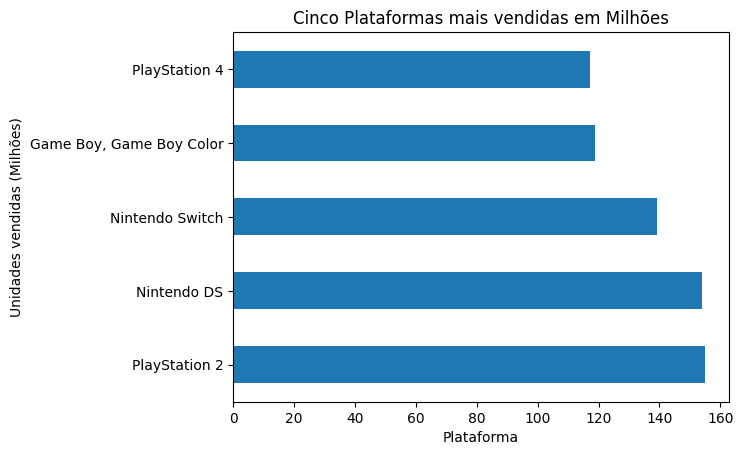

In [48]:
top5.plot(x='Plataforma', y='Unidades vendidas(Mi)', kind='barh', legend=False)
plt.xlabel('Plataforma')
plt.ylabel('Unidades vendidas (Milhões)')
plt.title('Cinco Plataformas mais vendidas em Milhões')
plt.show()

##### Podemos observar nesse primeiro gráfico que em numeros gerais O Playstation 2 desde o seu lançamento em 2000 continua sendo o video game mais vendido de todos os tempos, seguido pelos portáteis da Nintendo: DS, Switch(hibrido) e Gameboy e Gameboy Color.

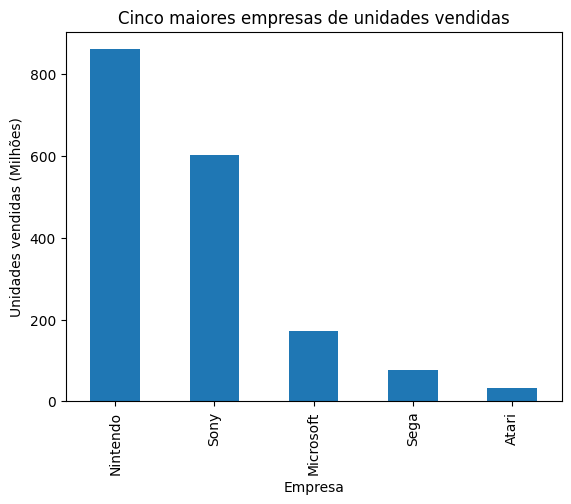

In [49]:
top5_empresas = df_empresas.head(5)
top5_empresas.plot(x='Empresa', y='Unidades vendidas(Mi)', kind='bar', legend=False)
plt.xlabel('Empresa')
plt.ylabel('Unidades vendidas (Milhões)')
plt.title('Cinco maiores empresas de unidades vendidas')
plt.show()

##### Muito embora a Sony ainda tenha o video-game com maior venda de todos os tempos, somando os consoles e portáteis das marcas, a Nintendo foi quem mais vendeu video-game até hoje, mas a nintendo está a pelo menos 10 a 15 anos a mais no mercado e vendeu muito desde o Nintendo Enterteinment System (NES).

In [50]:
df_nintendo = df_consoles[df_consoles['Empresa'].str.contains('Nintendo')]
df_nintendo = df_nintendo.sort_values(by='Unidades vendidas(Mi)', ascending=False).reset_index()
df_nintendo

,index,Plataforma,Unidades vendidas(Mi),Empresa,Lançamento[2]
0,1,Nintendo DS,154.02,Nintendo,2004
1,2,Nintendo Switch,139.36,Nintendo,2017
2,3,"Game Boy, Game Boy Color",118.69,Nintendo,"1989, 1998"
3,6,Wii,101.63,Nintendo,2006
4,9,Game Boy Advance,81.51,Nintendo,2001
5,11,Nintendo 3DS,75.94,Nintendo,2011
6,12,Nintendo Entertainment System,61.91,Nintendo,1983
7,15,Super Nintendo Entertainment System,49.10,Nintendo,1990
8,17,Nintendo 64,32.93,Nintendo,1996
9,20,Nintendo GameCube,21.74,Nintendo,2001


C:\Users\leand\AppData\Local\Temp\ipykernel_13540\1065673040.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas(Mi)', y='Plataforma', data=df_nintendo, palette='viridis')


<Axes: xlabel='Unidades vendidas(Mi)', ylabel='Plataforma'>

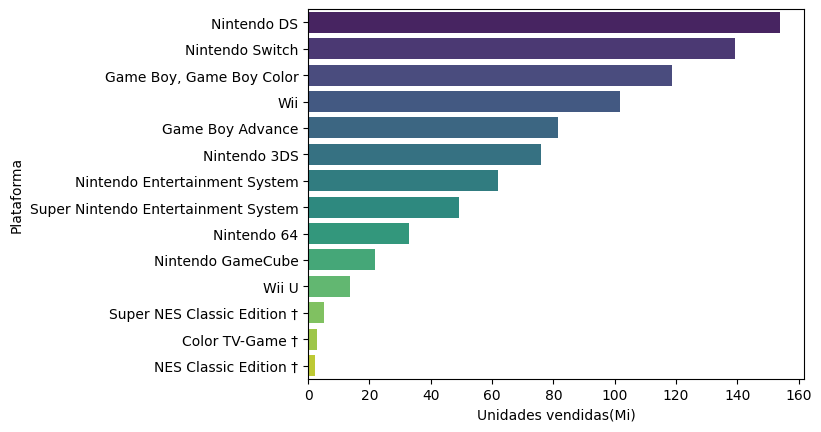

In [51]:
sns.barplot(x='Unidades vendidas(Mi)', y='Plataforma', data=df_nintendo, palette='viridis')

##### Analisando agora somente as vendas de produtos Nintendo o nintendo DS que inclui as versoes DS, DSi, DSXL, etc.. segue como sendo o portátil e o videogame mais vendido da historia da nintendo, e não muito atrás mesmo com seu lançamento bem mais recente o Nintendo Switch, lançado em 2017 está próximo de passar o DS que foi lançado em 2004, já descontinuado. 
##### Nos 6 mais vendidos da Nintendo encontram-se 5 videogames portáteis, entre eles o switch que é um hibrido de Console com portátil.

In [52]:
df_sony = df_consoles[df_consoles['Empresa'].str.contains('Sony')].reset_index()
df_sony = df_sony.sort_values(by='Unidades vendidas(Mi)', ascending=False).reset_index()
df_sony

,level_0,index,Plataforma,Unidades vendidas(Mi),Empresa,Lançamento[2]
0,0,0,PlayStation 2,155.10,Sony,2000
1,1,4,PlayStation 4,117.20,Sony,2013
2,2,5,PlayStation,102.49,Sony,1994
3,3,7,PlayStation 3,87.40,Sony,2006
4,4,10,PlayStation Portable,80.82,Sony,2004
5,5,14,PlayStation 5,50.00,Sony,2020
6,6,24,PlayStation Vita,10.15,Sony,2011


C:\Users\leand\AppData\Local\Temp\ipykernel_13540\380412808.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas(Mi)', y='Plataforma', data=df_sony, palette='viridis')


<Axes: xlabel='Unidades vendidas(Mi)', ylabel='Plataforma'>

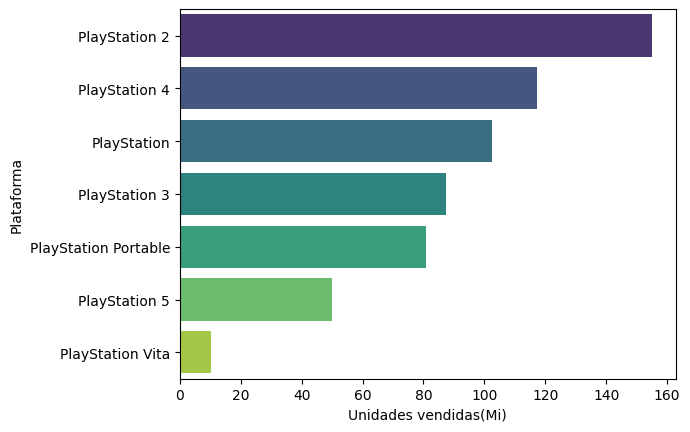

In [53]:
sns.barplot(x='Unidades vendidas(Mi)', y='Plataforma', data=df_sony, palette='viridis')

##### Ao contrário da nintendo os nos 5 mais vendidos somente 1 o Playstarion Portable (PSP) é portátil, o restante são todos consoles de mesa.
##### Muito embora o PSP tenha vendido bem, e seu sucessor era para seguir o mesmo caminho, não fez o mesmo sucesso devido ao valor que era elevado, custava o mesmo que o Playstation 3 que é console de mesa, e o valor dos jogos que não eram baratos. Além de concorrer com a linha mais vendida da Nintendo a DS que tinha sido lançada a variante 3DS que era possível ver o jogo em 3 dimensões sem o uso de oculos especial.

In [54]:
df_microsoft = df_consoles[df_consoles['Empresa'].str.contains('Microsoft')]
df_microsoft = df_microsoft.sort_values(by='Unidades vendidas(Mi)', ascending=False).reset_index()
df_microsoft

,index,Plataforma,Unidades vendidas(Mi),Empresa,Lançamento[2]
0,8,Xbox 360,84.0,Microsoft,2005
1,13,Xbox One,51.0,Microsoft,2013
2,19,Xbox,24.0,Microsoft,2001
3,22,Xbox Series X/S,12.0,Microsoft,2020


C:\Users\leand\AppData\Local\Temp\ipykernel_13540\3471460425.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas(Mi)', y='Plataforma', data=df_microsoft, palette='viridis')


<Axes: xlabel='Unidades vendidas(Mi)', ylabel='Plataforma'>

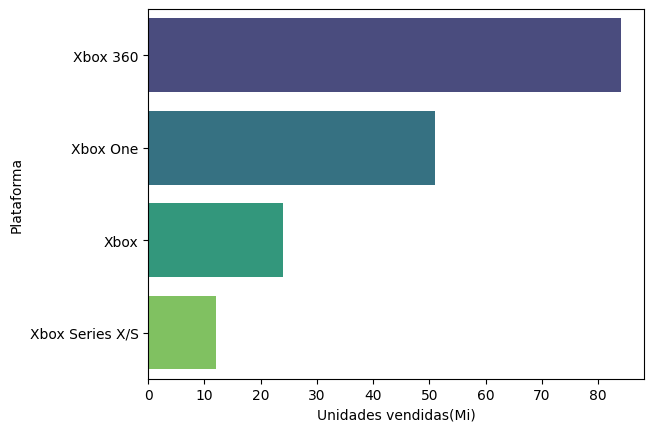

In [55]:
sns.barplot(x='Unidades vendidas(Mi)', y='Plataforma', data=df_microsoft, palette='viridis')

##### A Microsoft entrou no mundo dos games com o XBOX no final dos anos 90 com o intuito de concorrer com o Playstation 2, Mas a empresa Americana não teve o mesmo sucesso que a Nipônica, não agradou tanto.
##### Com o aumento da pirataria ajudou a vender o XBOX 360, que veio para concorrer com o Playstation 3, ultrapassou a faixa dos 80 milhões de vendas empatando assim como o console da Sony.
##### O seu sucessor o Xbox One teve uma venda significativa mas, não vendeu tanto quanto o XBOX 360.
##### E o XBOX Series X/S não agradou o povo e vendeu pouco até comparando com o Xbox 1

In [56]:
df_sega = df_consoles[df_consoles['Plataforma'].str.contains('Sega')]
df_sega = df_sega.sort_values(by='Unidades vendidas(Mi)', ascending=False).reset_index()
df_sega

,index,Plataforma,Unidades vendidas(Mi),Empresa,Lançamento[2]
0,23,Sega Game Gear,10.62,Sega,1990
1,27,Sega Saturn,9.26,Sega,1994
2,31,Sega Pico,3.40,Sega,1993


C:\Users\leand\AppData\Local\Temp\ipykernel_13540\3525571763.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas(Mi)', y='Plataforma', data=df_sega, palette='viridis')


<Axes: xlabel='Unidades vendidas(Mi)', ylabel='Plataforma'>

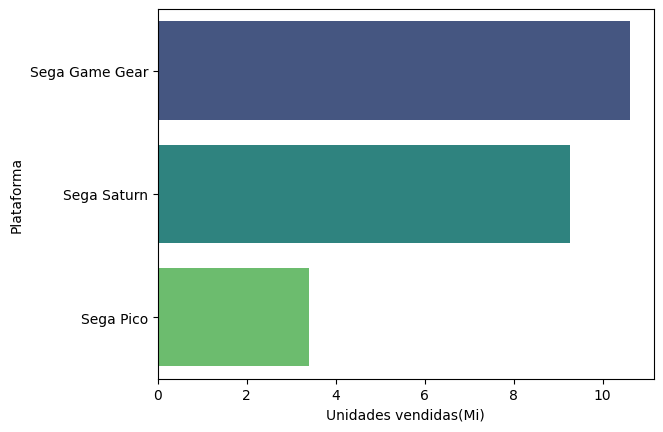

In [57]:
sns.barplot(x='Unidades vendidas(Mi)', y='Plataforma', data=df_sega, palette='viridis')

##### Dos videogames listados da SEGA o mais vendido foi o Portátil Game Gear, seguido pelo concorrente do Playtation 1.
##### E um que não diria ser um videogame mas sim um brinquedo infantil Pico.

In [58]:
df_atari = df_consoles[df_consoles['Plataforma'].str.contains('Atari')]
df_atari = df_atari.sort_values(by='Unidades vendidas(Mi)', ascending=False).reset_index()
df_atari

,index,Plataforma,Unidades vendidas(Mi),Empresa,Lançamento[2]
0,18,Atari 2600,30.0,Atari,1977
1,38,Atari Lynx,1.0,Atari,1989
2,39,Atari 5200,1.0,Atari,1982


C:\Users\leand\AppData\Local\Temp\ipykernel_13540\3050648930.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas(Mi)', y='Plataforma', data=df_atari, palette='viridis')


<Axes: xlabel='Unidades vendidas(Mi)', ylabel='Plataforma'>

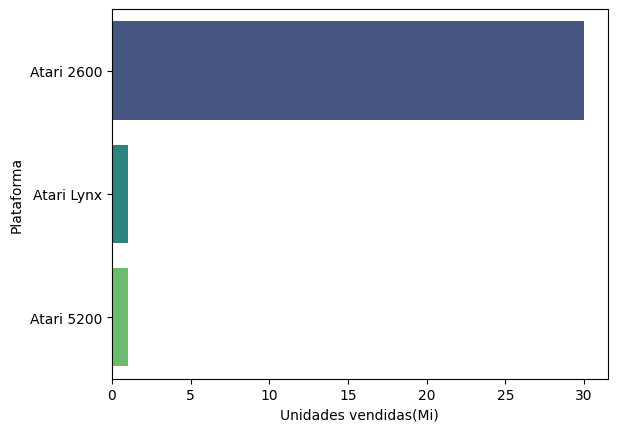

In [59]:
sns.barplot(x='Unidades vendidas(Mi)', y='Plataforma', data=df_atari, palette='viridis')

##### A atari fez sua historia com seu primeiro console em 1977 um dos primeiros a lançados, que infelizmente não conseguiu mais implacar seus aparelhos e não aguentou a concorrencia com a Nintendo.

In [60]:
from datetime import datetime

In [61]:
df_consoles['Lançamento[2]'] = df_consoles['Lançamento[2]'].str.replace('1989, 1998', '1989').astype('int64')


##### Nessa parte da Análise criei duas colunas na tabela, uma de idade, para saber quantos anos o videogame tem de lançamento. E criei outra coluna em que dividi o valor de Unidades vendidas por Idade para saber quantas unidades por ano foram vendidas.

In [62]:
df_consoles['Idade'] = datetime.today().year - df_consoles['Lançamento[2]'].astype(int)
df_consoles

,Plataforma,Unidades vendidas(Mi),Empresa,Lançamento[2],Idade
0,PlayStation 2,155.10,Sony,2000,24
1,Nintendo DS,154.02,Nintendo,2004,20
2,Nintendo Switch,139.36,Nintendo,2017,7
3,"Game Boy, Game Boy Color",118.69,Nintendo,1989,35
4,PlayStation 4,117.20,Sony,2013,11
5,PlayStation,102.49,Sony,1994,30
6,Wii,101.63,Nintendo,2006,18
7,PlayStation 3,87.40,Sony,2006,18
8,Xbox 360,84.00,Microsoft,2005,19
9,Game Boy Advance,81.51,Nintendo,2001,23


In [63]:
df_consoles['Vendas/Ano'] = df_consoles['Unidades vendidas(Mi)'] / df_consoles['Idade']
df_consoles = df
df_consoles

,Pos.,Plataforma,Unidades vendidas(Mi),Empresa,Lançamento[2],Ref.
0,1,PlayStation 2,155.10,Sony,2000,[a]
1,2,Nintendo DS,154.02,Nintendo,2004,[30]
2,3,Nintendo Switch,139.36,Nintendo,2017,[31]
3,4,"Game Boy, Game Boy Color",118.69,Nintendo,"1989, 1998",[b]
4,5,PlayStation 4,117.20,Sony,2013,[33]
5,6,PlayStation,102.49,Sony,1994,[34]
6,7,Wii,101.63,Nintendo,2006,[30]
7,8,PlayStation 3,87.40,Sony,2006,[a]
8,9,Xbox 360,84.00,Microsoft,2005,[c]
9,10,Game Boy Advance,81.51,Nintendo,2001,[30]


In [64]:
top10_consoles = df_consoles.head(10)
top10_consoles = top10_consoles.sort_values(by='Vendas/Ano', ascending=False).reset_index()
sns.barplot(x='Vendas/Ano', y='Plataforma', data=top10_consoles, palette='viridis')

KeyError: 'Vendas/Ano'

##### Agora analisando as vendas comparando quantas unidades foram vendidas desde o lançamento, a Nintendo com seu Console hibrido Switch assumiu a liderança, pois com 7 anos de seu lançamento vendeu 20 milhões de aparelhos.

##### Muitos dos videogames caíram de posição, como o PlayStation 2 que está na quarta posição nesse parâmetro, mas lembrando que ele sua produção foi descontinuada a vários anos.

C:\Users\leand\AppData\Local\Temp\ipykernel_19788\2829604211.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vendas/Ano', y='Empresa', data=top5_marcas, palette='viridis',order=top5_marcas['Empresa'])


<Axes: xlabel='Vendas/Ano', ylabel='Empresa'>

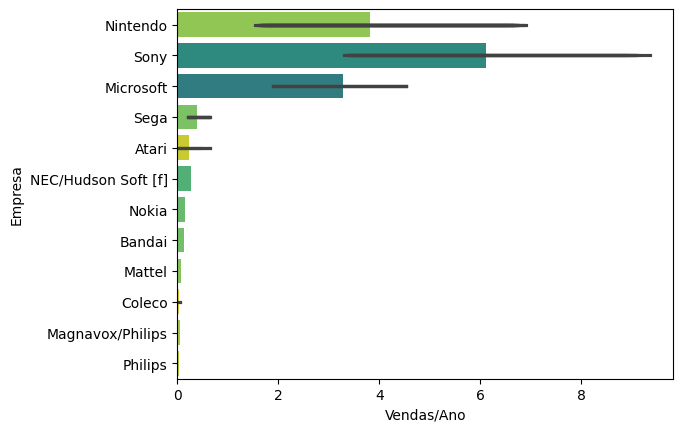

In [ ]:
top5_marcas = df_consoles.sort_values(by='Empresa', ascending=False).reset_index()
top5_marcas = top5_marcas.sort_values(by='Vendas/Ano', ascending=False).reset_index()
sns.barplot(x='Vendas/Ano', y='Empresa', data=top5_marcas, palette='viridis',order=top5_marcas['Empresa'])

##### Muito embora a Nintendo voltou a ter uma subida em seus números a Sony tendo todos os seus Consoles e Portáteis segue na liderança como a empresa que mais vendeu videogames.

C:\Users\leand\AppData\Local\Temp\ipykernel_19788\3450758478.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas', y='Plataforma', data=top10_consoles_mesa, palette='viridis')


<Axes: xlabel='Unidades vendidas', ylabel='Plataforma'>

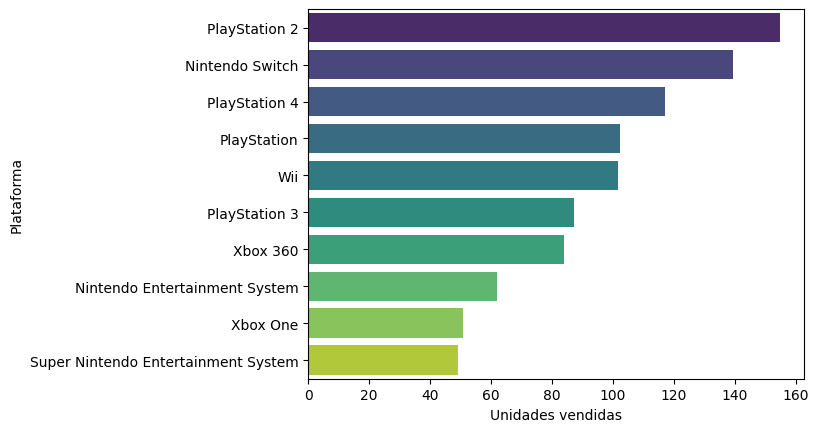

In [ ]:
top10_consoles_mesa = tabela_mesa.head(10)
sns.barplot(x='Unidades vendidas', y='Plataforma', data=top10_consoles_mesa, palette='viridis')


##### Analisando somente a venda de Consoles de mesa, podemos observar que nas 6 primeiras colocações praticamente Nintendo e Sony intercalam somente na 7ª posição aparece o XBOX 360 e o XBOX One na 9ª COlocação e a Nintendo fechando o top10

C:\Users\leand\AppData\Local\Temp\ipykernel_19788\2416918166.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas', y='Empresa', data=top_3_mesa, palette='viridis')


<Axes: xlabel='Unidades vendidas', ylabel='Empresa'>

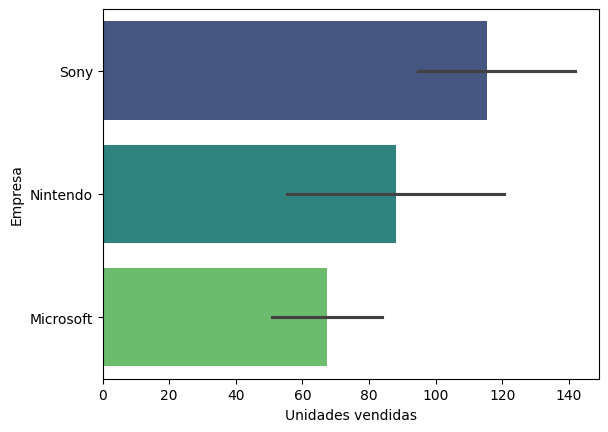

In [ ]:
top_3_mesa = tabela_mesa.head(10)
sns.barplot(x='Unidades vendidas', y='Empresa', data=top_3_mesa, palette='viridis')


##### Como não é surpresa as três empresas que mais vendem são, Sony, Nintendo e Microsoft.
##### A nintendo teve alguns tropeços e más escolhas mas está se recuperando, e a Microsoft está comendo poeira

In [ ]:
tabela_mesa['Idade'] = datetime.today().year - tabela_mesa['Lançamento[2]'].astype(int)
tabela_mesa['Vendas/Ano'] = tabela_mesa['Unidades vendidas'] / tabela_mesa['Idade']
tabela_mesa

,Pos.,Plataforma,Unidades vendidas,Empresa,Lançamento[2],Ref.,Idade,Vendas/Ano
0,1,PlayStation 2,155.00,Sony,2000,[a],24,6.458333
1,2,Nintendo Switch,139.36,Nintendo,2017,[31],7,19.908571
2,3,PlayStation 4,117.20,Sony,2013,[33],11,10.654545
3,4,PlayStation,102.49,Sony,1994,[34],30,3.416333
4,5,Wii,101.63,Nintendo,2006,[30],18,5.646111
5,6,PlayStation 3,87.40,Sony,2006,[a],18,4.855556
6,7,Xbox 360,84.00,Microsoft,2005,[c],19,4.421053
7,8,Nintendo Entertainment System,61.91,Nintendo,1983,[30],41,1.510000
8,9,Xbox One,51.00,Microsoft,2013,[c],11,4.636364
9,10,Super Nintendo Entertainment System,49.10,Nintendo,1990,[30],34,1.444118


C:\Users\leand\AppData\Local\Temp\ipykernel_19788\932271166.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vendas/Ano', y='Plataforma', data=tabela_mesa, palette='viridis')


<Axes: xlabel='Vendas/Ano', ylabel='Plataforma'>

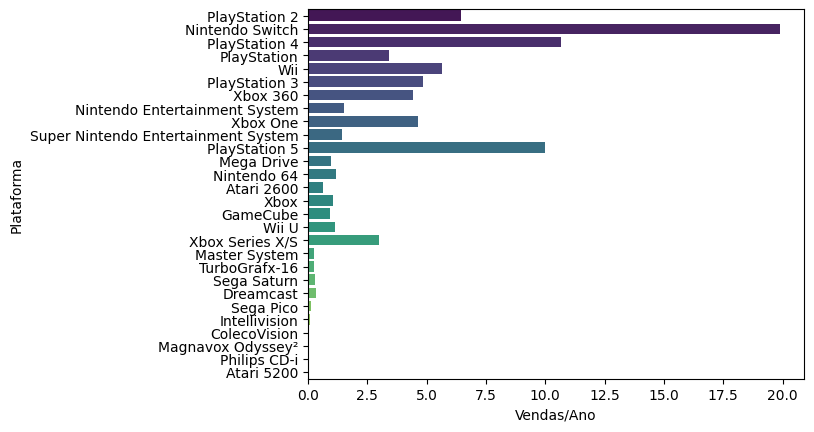

In [ ]:
sns.barplot(x='Vendas/Ano', y='Plataforma', data=tabela_mesa, palette='viridis')

##### Podemos observar que demonstrando todos os Consoles de mesa listados Basicamente a concorrencia maior está entre Nintendo e Sony as duas maiores empresas

In [71]:
df_mesa_nintendo = tabela_mesa[tabela_mesa['Empresa'] == 'Nintendo']
df_mesa_sony = tabela_mesa[tabela_mesa['Empresa'] == 'Sony']
df_mesa_microsoft = tabela_mesa[tabela_mesa['Empresa'] == 'Microsoft']
df_mesa_sega = tabela_mesa[tabela_mesa['Empresa'] == 'Sega']
df_mesa_atari = tabela_mesa[tabela_mesa['Empresa'] == 'Atari']

C:\Users\leand\AppData\Local\Temp\ipykernel_19788\1831315610.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vendas/Ano', y='Empresa', data=tabela_mesa, palette='viridis')


<Axes: xlabel='Vendas/Ano', ylabel='Empresa'>

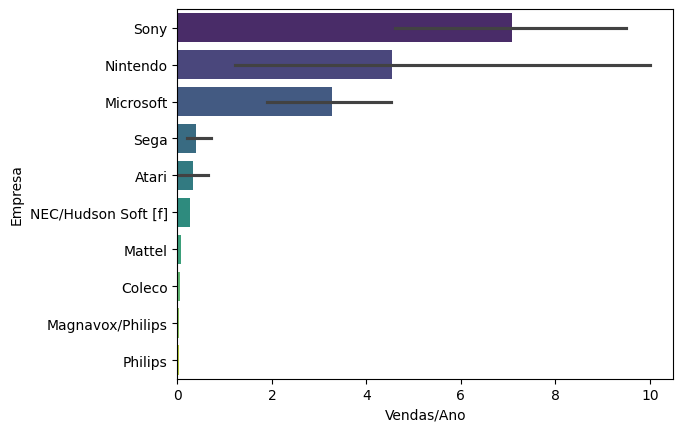

In [ ]:
sns.barplot(x='Vendas/Ano', y='Empresa', data=tabela_mesa, palette='viridis')

##### Nesse gráfico podemos observar melhor o quando a Sony está na frente das demais

In [ ]:
df_mesa_sony

,Pos.,Plataforma,Unidades vendidas,Empresa,Lançamento[2],Ref.,Idade,Vendas/Ano
0,1,PlayStation 2,155.00,Sony,2000,[a],24,6.458333
2,3,PlayStation 4,117.20,Sony,2013,[33],11,10.654545
3,4,PlayStation,102.49,Sony,1994,[34],30,3.416333
5,6,PlayStation 3,87.40,Sony,2006,[a],18,4.855556
10,11,PlayStation 5,40.00,Sony,2020,[45],4,10.000000


C:\Users\leand\AppData\Local\Temp\ipykernel_13540\120908423.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas', y='Plataforma', data=df_mesa_nintendo, palette='viridis')


<Axes: xlabel='Unidades vendidas', ylabel='Plataforma'>

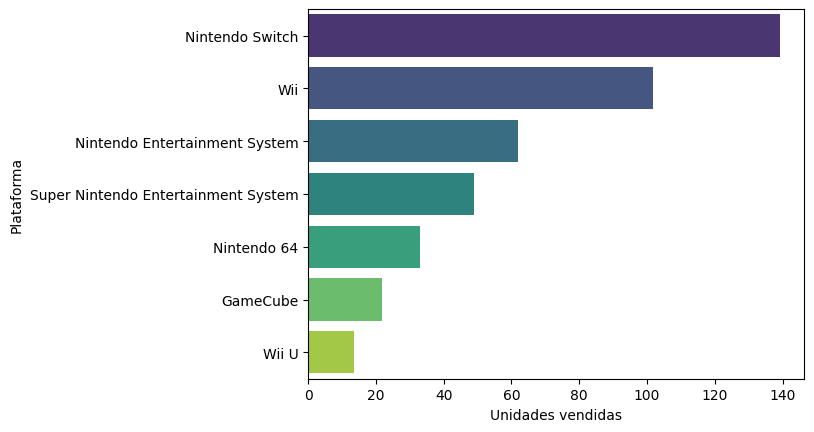

In [72]:
sns.barplot(x='Unidades vendidas', y='Plataforma', data=df_mesa_nintendo, palette='viridis')

##### Vendo agora somente os Consoles de mesa da Japonesa Nintendo, pode-se observar a evolução das vendas, onde o Nintendo Entertainement System teve uma venda muito boa, seu sucessor Super Nintendo (SNES) vendeu bem mas não tanto como seu antecessor, ainda mais com a chegada do Playstation em 1994, e seus sucessores, Nintendo 64, Game Cube, teve uma grande melhora nas vendas com o Wii, devido a sua forma de jogar mais interativa onde precisava-se não só dos direcionais e botões, tinha que fazer movimentos com os braços para jogar. A nesma sorte não teve o sucessor Wii U, que vinha como uma proposta de semi-portátil, mas não caiu no gosto popular.
##### Já o Console mais vendido da Nintendo aperfeiçoando a proposta do Wii U, já vendeu mais de 130 milhões de unidades em 7 anos.

C:\Users\leand\AppData\Local\Temp\ipykernel_19788\2935391030.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas', y='Plataforma', data=df_mesa_sony, palette='viridis')


<Axes: xlabel='Unidades vendidas', ylabel='Plataforma'>

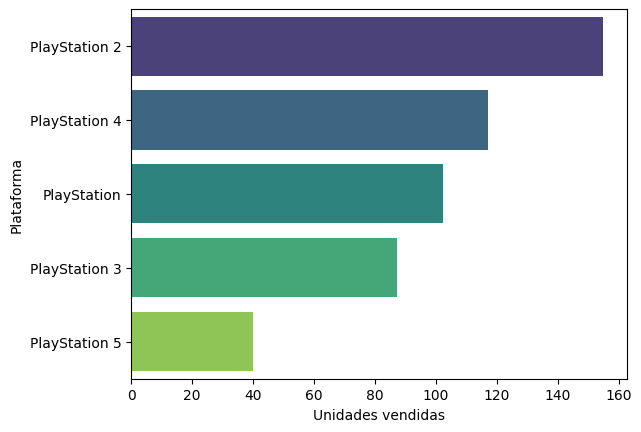

In [144]:
sns.barplot(x='Unidades vendidas', y='Plataforma', data=df_mesa_sony, palette='viridis')

##### A Sony, empresa que mais vende Consoles de Mesa, está enfrentando uma queda de vendas, haja vista que o mais vendido foi o PS2, seguido do Playstation 4, que engloba, PS4, PS4 Slim e o mais poderoso PS4 Pro. O primeiro Playstation está no top 3. E podemos ver que o PS5 não conseguiu ainda se quer bater a marca do PS3, muito se dá pela escasses de unidades a venda, e o elevado preço.

C:\Users\leand\AppData\Local\Temp\ipykernel_19788\1262474987.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas', y='Plataforma', data=df_mesa_microsoft, palette='viridis')


<Axes: xlabel='Unidades vendidas', ylabel='Plataforma'>

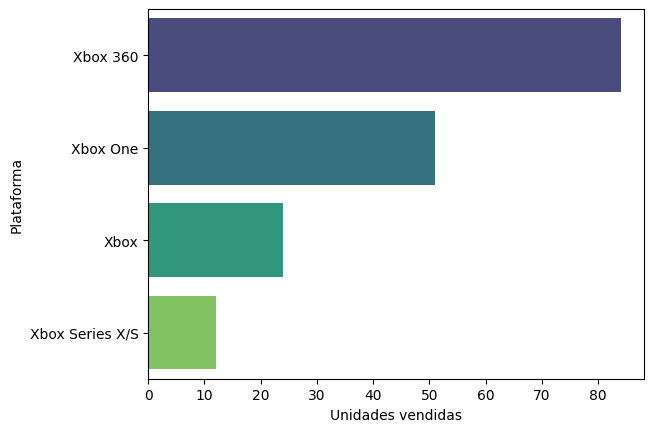

In [145]:
sns.barplot(x='Unidades vendidas', y='Plataforma', data=df_mesa_microsoft, palette='viridis')

##### A microsoft que teve um boom de vendas com o Xbox 360, está em queda e não conseguindo recuperar o sucesso anterior, pode-se observar pelos números do Xbox One, e Xbox Series X/S.

C:\Users\leand\AppData\Local\Temp\ipykernel_19788\1814170781.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas', y='Plataforma', data=df_mesa_sega, palette='viridis')


<Axes: xlabel='Unidades vendidas', ylabel='Plataforma'>

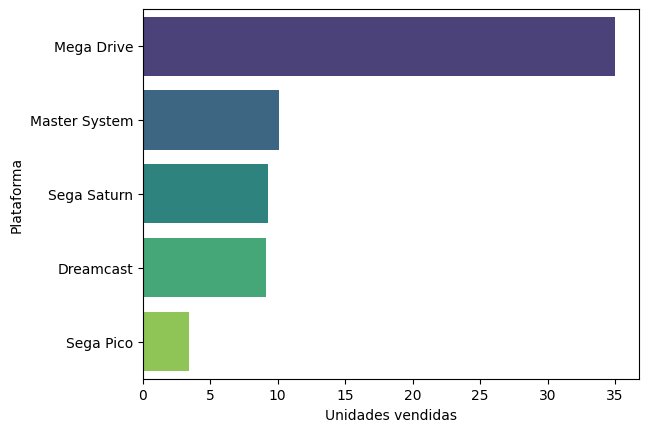

In [146]:
sns.barplot(x='Unidades vendidas', y='Plataforma', data=df_mesa_sega, palette='viridis')

##### A nipônica SEGA já não tem consoles de mesa a muito tempo, Travava uma boa batalha com sua copatriota Nintendo, no final dos anos 80 começo dos 90 mas com a chegada da Sony não conseguiu acompanhar e encerrou suas atividades de Fabricação de Consoles.
##### A evolução das vendas no Mega Drive em relação ao Master System é enorme, mas o Saturn não conseguiu ser páreo para o PlayStation e o DreamCast que vendeu tão pouco quanto

C:\Users\leand\AppData\Local\Temp\ipykernel_19788\2825160042.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas', y='Plataforma', data=df_mesa_atari, palette='viridis')


<Axes: xlabel='Unidades vendidas', ylabel='Plataforma'>

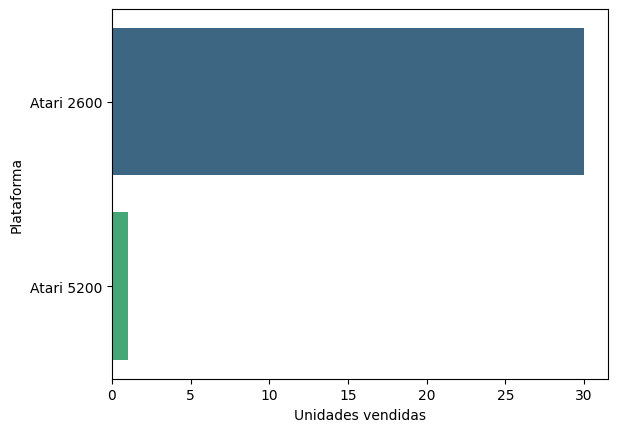

In [147]:
sns.barplot(x='Unidades vendidas', y='Plataforma', data=df_mesa_atari, palette='viridis')

##### Como dito anteriormente a Atari fez um grande sucesso em 1977 como uma das primeiras marcas a vender Consoles, sucesso esse que não alcançou o 5200, sucessor do 2600, teve alguns lançamentos até o começo dos anos 90 mas encerrou suas fabricações de Consoles.

In [116]:
tabela_portatil['idade'] = datetime.today().year - tabela_portatil['Lançamento[2]'].astype(int)
tabela_portatil['Vendas/Ano'] = tabela_portatil['Unidades vendidas'] / tabela_portatil['idade']
tabela_portatil

,Pos.,Plataforma,Unidades vendidas,Empresa,Lançamento[2],Ref.,idade,Vendas/Ano
0,1,Nintendo DS,154.02,Nintendo,2004,[30],20,7.701000
1,2,Nintendo Switch,139.36,Nintendo,2017,[31],7,19.908571
2,3,Game Boy Advance,81.51,Nintendo,2001,[30],23,3.543913
3,4,PlayStation Portable,80.82,Sony,2004,[a],20,4.041000
4,5,Nintendo 3DS,75.94,Nintendo,2011,[44],13,5.841538
5,6,Game Boy,69.42,Nintendo,1989,[b],35,1.983429
6,7,Game Boy Color,49.27,Nintendo,1998,[b],26,1.895000
7,8,Sega Game Gear,10.62,Sega,1990,[50],34,0.312353
8,9,PlayStation Vita,10.15,Sony,2011,[a],13,0.780769
9,10,N-Gage,3.00,Nokia,2003,[75],21,0.142857


C:\Users\leand\AppData\Local\Temp\ipykernel_19788\266591072.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas', y='Plataforma', data=tabela_portatil, palette='viridis')


<Axes: xlabel='Unidades vendidas', ylabel='Plataforma'>

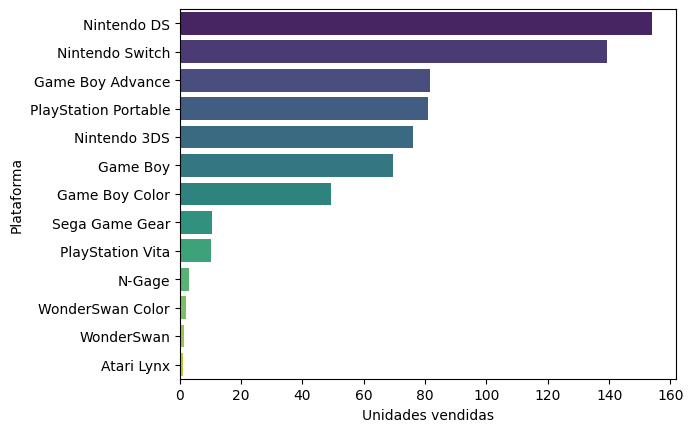

In [123]:
#top10_consoles = df_consoles.head(10)
#top10_consoles = top10_consoles.sort_values(by='Vendas/Ano', ascending=False).reset_index()
sns.barplot(x='Unidades vendidas', y='Plataforma', data=tabela_portatil, palette='viridis')

##### Nos portáteis a história muda de lado, haja vista que nesse campo a Nintendo está muito a frente, tendo seus portáteis DS e Gameboy Advance e o Console Hibrido Switch no top 3. A Sony conseguiu com seu PSP a Quarta colocação, a Sega com o Gamegear na 9ª Colocação. Mas a Nintendo domina a venda de portáteis.
##### Fato curioso que o GameGear veio com o intuito de fazer concorrência ao famigerado GameBoy que tinha tela de cristal liquido preto e branco sem retroiluminação. Por outro lado o portátil da Sega tinha tela colorida e retroiluminada mas, o excessivo gasto com pilhas e a dificuldade de encontrar Jogos fez que a empresa do Sonic não conseguisse competir com o GameBoy ainda mais pq o portátil da Nintendo era mais barato.

C:\Users\leand\AppData\Local\Temp\ipykernel_19788\2455212794.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas', y='Empresa', data=tabela_portatil, palette='viridis')


<Axes: xlabel='Unidades vendidas', ylabel='Empresa'>

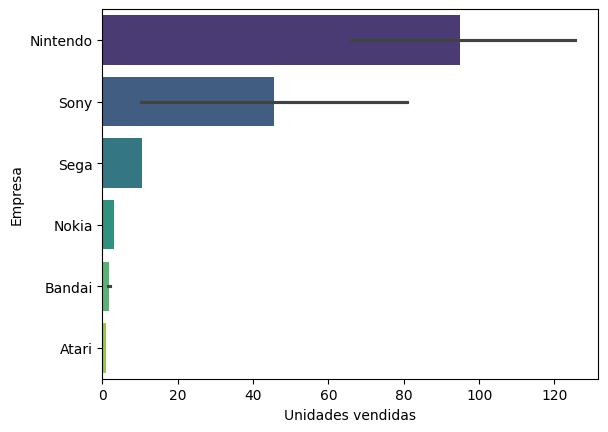

In [124]:
sns.barplot(x='Unidades vendidas', y='Empresa', data=tabela_portatil, palette='viridis')

##### Aqui fica demonstrado o mencionado acima que a Nintendo domina o mundo dos portáteis.

In [125]:
top10_portatil = tabela_portatil.head(10)
top10_portatil = top10_portatil.sort_values(by='Vendas/Ano', ascending=False).reset_index()

C:\Users\leand\AppData\Local\Temp\ipykernel_19788\952777988.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas', y='Plataforma', data=top10_portatil, palette='viridis')


<Axes: xlabel='Unidades vendidas', ylabel='Plataforma'>

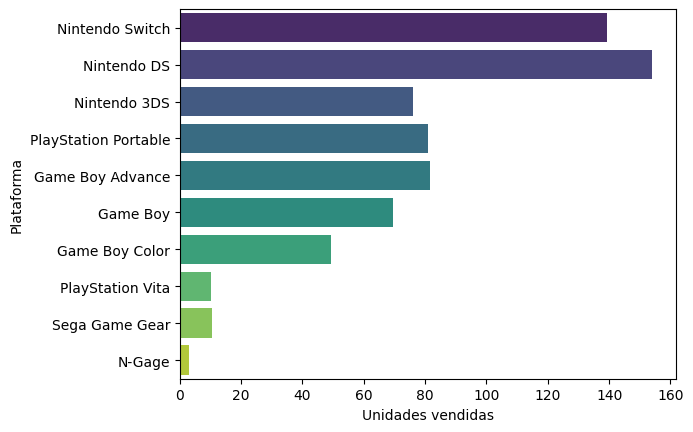

In [127]:
sns.barplot(x='Unidades vendidas', y='Plataforma', data=top10_portatil, palette='viridis')

##### Um fato curioso é que mesmo sendo um hibrido de celular com Video-Game e não tendo tantas vendas quanto seus concorrentes o N-Gage da Nokia, entrou no top 10

C:\Users\leand\AppData\Local\Temp\ipykernel_19788\957679792.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas', y='Empresa', data=top10_portatil, palette='viridis')


<Axes: xlabel='Unidades vendidas', ylabel='Empresa'>

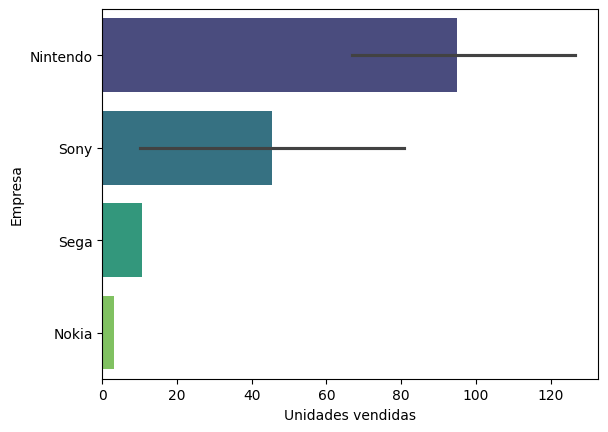

In [126]:
sns.barplot(x='Unidades vendidas', y='Empresa', data=top10_portatil, palette='viridis')

##### Em Unidades vendidas, pode-se confirmar que a Nintendo domina os portáteis

C:\Users\leand\AppData\Local\Temp\ipykernel_19788\1502505238.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vendas/Ano', y='Empresa', data=top10_portatil, palette='viridis')


<Axes: xlabel='Vendas/Ano', ylabel='Empresa'>

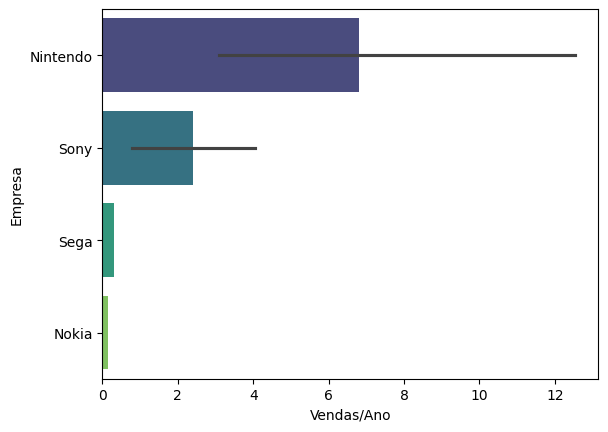

In [129]:
sns.barplot(x='Vendas/Ano', y='Empresa', data=top10_portatil, palette='viridis')

##### O mesmo se repete na vendas por ano

In [156]:
df_portatil_nintendo = tabela_portatil[tabela_portatil['Empresa'] == 'Nintendo']
df_portatil_sony = tabela_portatil[tabela_portatil['Empresa'] == 'Sony']


C:\Users\leand\AppData\Local\Temp\ipykernel_19788\2756057639.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas', y='Plataforma', data=df_portatil_nintendo, palette='viridis')


<Axes: xlabel='Unidades vendidas', ylabel='Plataforma'>

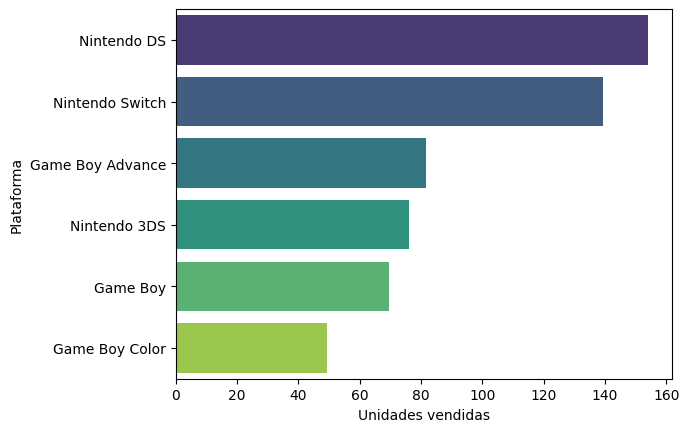

In [152]:
sns.barplot(x='Unidades vendidas', y='Plataforma', data=df_portatil_nintendo, palette='viridis')

##### Nesse momento observando apenas os números da Nintendo, nesse Top 6 3 deles são da linha GameBoy que foi sucesso nos anos 90 e inicio dos 2000, liderado por seu sucessor DS e o Console hibrido Switch buscando a liderança

C:\Users\leand\AppData\Local\Temp\ipykernel_19788\1990813329.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas', y='Plataforma', data=df_portatil_sony, palette='viridis')


<Axes: xlabel='Unidades vendidas', ylabel='Plataforma'>

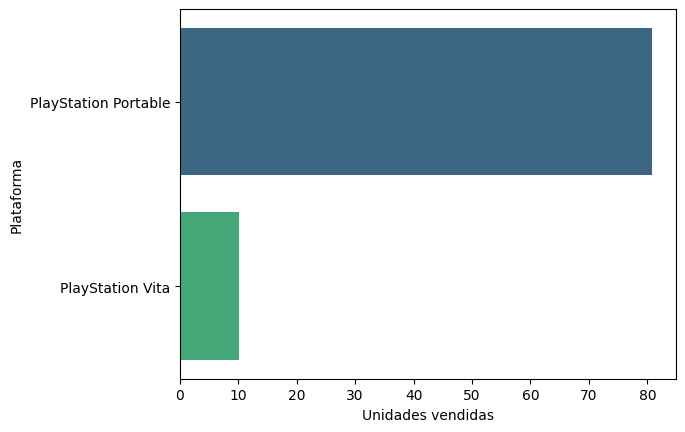

In [154]:
sns.barplot(x='Unidades vendidas', y='Plataforma', data=df_portatil_sony, palette='viridis')

##### Aqui vemos que o sucesso do PSP da Sony não se repetiu no PSVITA, que por esse motivo a Sony ainda não lançou um portátil novo

In [155]:
tabela_portatil['Idade'] = datetime.today().year - tabela_portatil['Lançamento[2]'].astype(int)
tabela_portatil['Vendas/Ano'] = tabela_portatil['Unidades vendidas'] / tabela_portatil['Idade']

C:\Users\leand\AppData\Local\Temp\ipykernel_19788\282213873.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vendas/Ano', y='Plataforma', data=df_portatil_nintendo, palette='viridis')


<Axes: xlabel='Vendas/Ano', ylabel='Plataforma'>

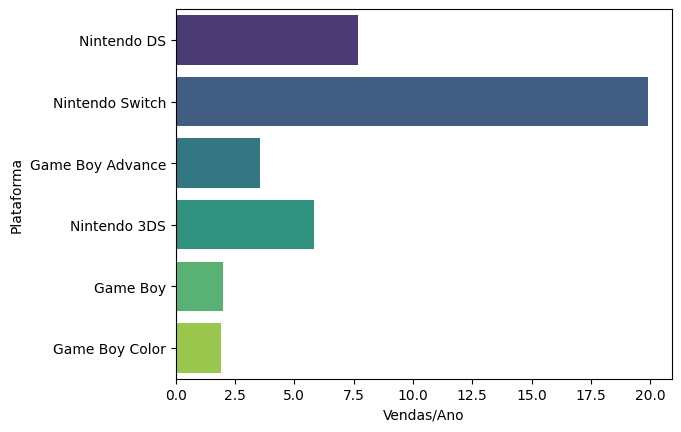

In [157]:
sns.barplot(x='Vendas/Ano', y='Plataforma', data=df_portatil_nintendo, palette='viridis')

##### E mais uma vez em vendas por ano, o Nintendo Switch, está muito a frente dos outros 

C:\Users\leand\AppData\Local\Temp\ipykernel_19788\23798527.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas', y='Plataforma', data=tabela_mesa_especial, palette='viridis')


<Axes: xlabel='Unidades vendidas', ylabel='Plataforma'>

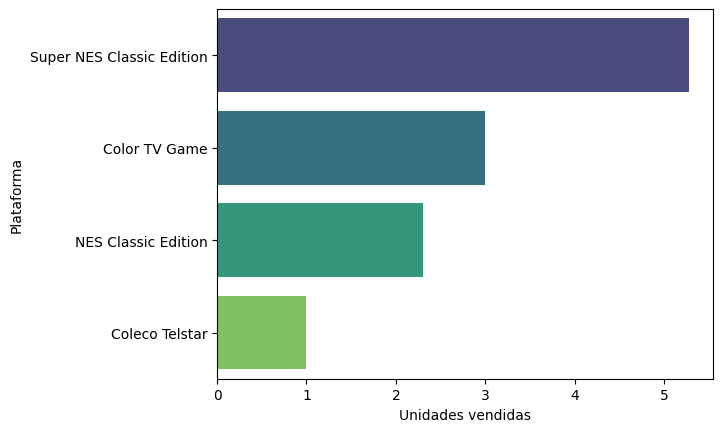

In [130]:
sns.barplot(x='Unidades vendidas', y='Plataforma', data=tabela_mesa_especial, palette='viridis')

##### Aproveitando o espirito de Nostalgia algumas empresas fizeram edições especiais de seus videogames antigos, onde o SNES foi de longe o mais vendido dos listados, A Atari também fez uma edição especial mas que não entrou na tabela.

C:\Users\leand\AppData\Local\Temp\ipykernel_19788\336092487.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unidades vendidas', y='Empresa', data=tabela_mesa_especial, palette='viridis')


<Axes: xlabel='Unidades vendidas', ylabel='Empresa'>

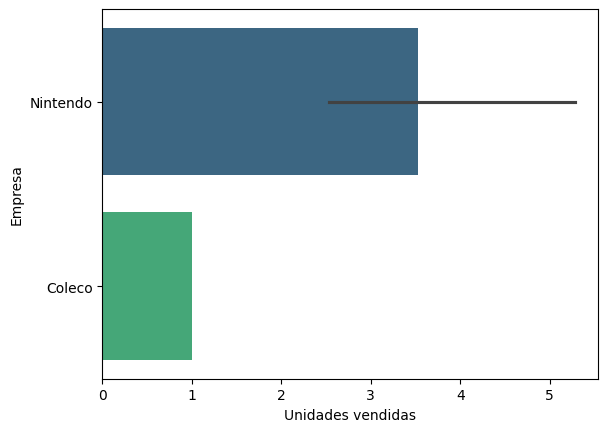

In [131]:
sns.barplot(x='Unidades vendidas', y='Empresa', data=tabela_mesa_especial, palette='viridis')

##### e nesse segmento a Nintendo também levou a melhor no quesito nostalgia

In [ ]:
tabela.to_excel('tabelaGeral.xlsx')
tabela_portatil.to_excel('tabelaPortatil.xlsx')
tabela_mesa_especial.to_excel('tabelaMesaEspecial.xlsx')
tabela_mesa.to_excel('tabelaMesa.xlsx')